### Importing the Libraries

In [745]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset

In [746]:
dataset = pd.read_pickle("emotion_dataset.pkl", compression='infer')
dataset.head()

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love


### Dimension Of the Dataset

In [747]:
rows, cols = dataset.shape
print(f'Emotion Dataset Contains {rows} rows and {cols} columns')

Emotion Dataset Contains 416809 rows and 2 columns


### Types of the Dataset

In [748]:
dataset.dtypes

text        object
emotions    object
dtype: object

### Visualize Unique and Duplicates Entities in  Dataset

<AxesSubplot: xlabel='Records', ylabel='Number of Rows'>

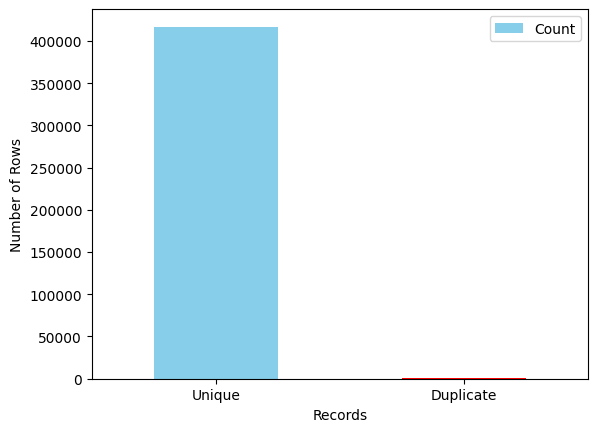

In [749]:
dup_rows = rows - len(dataset.drop_duplicates(subset=['text', 'emotions']))
dup_vis = pd.DataFrame({'Rows':['Unique', 'Duplicate'], 'Count':[rows, dup_rows]})
dup_vis.plot.bar(x='Rows', y='Count', xlabel='Records', ylabel='Number of Rows', rot=0, color=['skyblue', 'red'])

### Remove Duplicates Entities of the Dataset

In [750]:
dataset = dataset.drop_duplicates(subset=['text', 'emotions'])
print(f"Duplicate entities of the dataset were {dup_rows}") 
print(f"After dropping duplicate rows the remaining rows x cols of the dataset are {dataset.shape[0]} x {dataset.shape[1]}") 

Duplicate entities of the dataset were 686
After dropping duplicate rows the remaining rows x cols of the dataset are 416123 x 2


### Checking For Null Values in the Dataset

In [751]:
dataset.isna().any()

text        False
emotions    False
dtype: bool

In [752]:
print('There are no NULL values in the dataset')

There are no NULL values in the dataset


### Summary of the Dataset

In [753]:
dataset.describe()

,text,emotions
count,416123,416123
unique,393822,6
top,when,joy
freq,4,140779


### Bar Chart - Visualizing the Number of Entities against each Emotion

<AxesSubplot: xlabel='Emotions', ylabel='Records'>

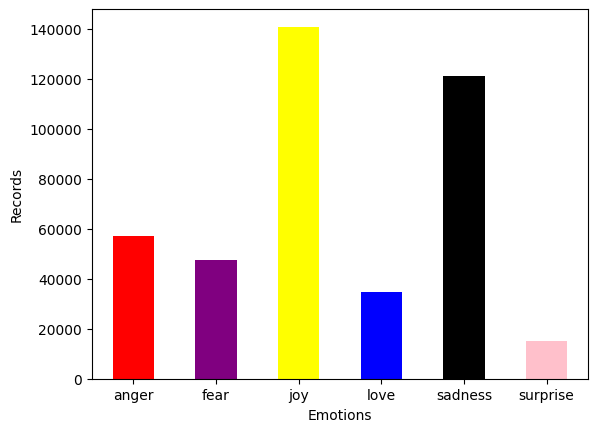

In [754]:
emotions_count = dataset.groupby(['emotions'])['emotions'].count()
col = ['red', 'purple', 'yellow', 'blue', 'black', 'pink']
emotions_count.plot.bar(xlabel='Emotions', ylabel='Records', rot=0, color=col)

### Pie Chart - Visualizing the Number of Entities against each Emotion

<AxesSubplot: ylabel='Emotions'>

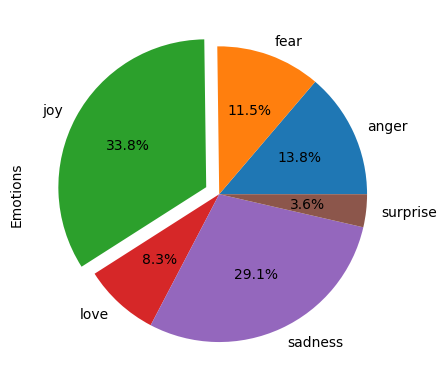

In [755]:
emotions_size = emotions_count = dataset.groupby(['emotions'])['emotions'].size()
explode = (0, 0, 0.1, 0, 0, 0)
emotions_size.plot(kind='pie', y = "v1", label = "Emotions", autopct='%1.1f%%', explode=explode)

### Download Stopwords

In [771]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Dependent and Independent Variable

In [756]:
X, y = dataset['text'], dataset['emotions']

In [757]:
X.head()

27383     i feel awful about it too because it s my job ...
110083                                im alone i feel awful
140764    ive probably mentioned this before but i reall...
100071             i was feeling a little low few days back
2837      i beleive that i am much more sensitive to oth...
Name: text, dtype: object

In [758]:
y.head()

27383     sadness
110083    sadness
140764        joy
100071    sadness
2837         love
Name: emotions, dtype: object

### Splitting into Training Set and Test Set

In [765]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset['text'], dataset['emotions'], random_state=123)

In [767]:
X_train.head()

1811     i already feel guilty about the amount of time...
26394    i started to feel a bit nostalgic about them s...
26833    i have found myself feeling vaguely uncomforta...
82762    i must say i feel a little jaded because my or...
1611     i also feel we live in fearful times that make...
Name: text, dtype: object

In [768]:
y_train.head()

1811     sadness
26394       love
26833       fear
82762    sadness
1611        fear
Name: emotions, dtype: object

In [769]:
X_test.head()

77005    i find myself feeling at my wits end i think o...
30184    i feel dirty deep inside covering myself in cr...
75670    i just feel ugly because im around a lot of at...
89078                           i hope you feel better hon
47549    ive never woken up from a dream feeling so fra...
Name: text, dtype: object

In [770]:
y_test.head()

77005        joy
30184    sadness
75670    sadness
89078        joy
47549       fear
Name: emotions, dtype: object

### Balancing the Dataset - Over Sampling

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
X = np.array(X)
X = X.reshape(len(X), 1)
X_res, y_res = smt.fit_resample(X, y)

In [ ]:
print(X_res[0:6])

[['i felt like an old person confronting technology for the first time which was a feeling that especially annoyed me since i prided myself as nothing if not somewhat tech proficient']
 ['im feeling bitchy']
 ['i am feeling rather resentful lately']
 ['i don t find it difficult but sometimes i feel the grumpy old lady coming out in me as']
 ['i see lovers i feel envious i want someone to be there for me']
 ['i feel bitter towards her for acting this way and sad that it happened because we had something so good going on and i get very attached to my friends']]


In [ ]:
print(y_res[0:6])

0    anger
1    anger
2    anger
3    anger
4    anger
5    anger
Name: emotions, dtype: object


### Inspect Dinemsions

In [743]:
print("Dimensions of X:", X.shape)
print("Dimensions of Y:", y.shape)

Dimensions of X: (416123, 1)
Dimensions of Y: (416123,)


### Classes

In [744]:
anger = y[y == 'anger']
joy = y[y == 'joy']
sadness = y[y == 'sadness']
surprise = y[y == 'surprise']
love = y[y == 'love']
fear = y[y == 'fear']
anger_count = anger.count()
joy_count = joy.count()
sadness_count = sadness.count()
surprise_count = surprise.count()
love_count = love.count()
fear_count = fear.count()
print("anger:", anger_count)
print("joy:", joy_count)
print("sadness:", sadness_count)
print("surprise:", surprise_count)
print("love:", love_count)
print("fear:", fear_count)

anger: 57235
joy: 140779
sadness: 120989
surprise: 14959
love: 34497
fear: 47664


### Bar Chart - Visualizing the Number of Entities against each Emotion

Text(0.5, 1.0, 'Emotion VS Text')

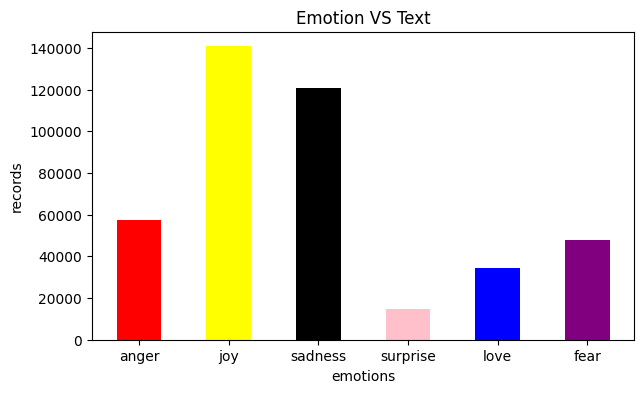

In [720]:
counts = [anger_count, joy_count, sadness_count, surprise_count, love_count, fear_count]
labels = ['anger', 'joy', 'sadness', 'surprise', 'love', 'fear']
colors = ['red', 'yellow', 'black', 'pink', 'blue', 'purple']
fig = plt.figure(figsize = (7, 4))
plt.bar(labels, counts, color=colors, width = 0.5)
plt.xlabel('emotions')
plt.ylabel('records')
plt.title('Emotion VS Text')

### Cleaning the Dataset

In [547]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
# clean the text
def clean_text(text):
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
# replace the old text with the cleaned text
dataset['text'] = dataset['text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [548]:
dataset.head()

,text,emotions
27383,feel awful job get position succeed happen,sadness
110083,im alone feel awful,sadness
140764,ive probably mentioned really feel proud actua...,joy
100071,feeling little low days back,sadness
2837,beleive much sensitive peoples feelings tend c...,love
